In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib
matplotlib.style.use('classic')
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
df = pd.read_csv("../../Processed Data/10K10Q/10K_10Q_dataset.csv")
df.date = pd.to_datetime(df.date, dayfirst=False)
df.set_index("date", inplace=True)
df = df[~df.Symbol.isin(["DOW", "WBA", "TRV", "DIS"])]
df.head()

,CIK,text_type,item,year,file_path,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,...,3_month_rtn,4_month_rtn,5_month_rtn,6_month_rtn,7_month_rtn,8_month_rtn,9_month_rtn,10_month_rtn,11_month_rtn,12_month_rtn
date,,,,,,,,,,,,,,,,,,,,,
2010-05-05,4962,10Q,item1,2010,.\Data File\Processed Data\Data_10Q\item1_4962...,AXP,American Express Co,reports,Financials,Financials,...,-0.040361,-0.064712,-0.132807,-0.015107,0.006990,0.023224,-0.008794,-0.011048,0.027959,0.125141
2011-05-04,4962,10Q,item1,2011,.\Data File\Processed Data\Data_10Q\item1_4962...,AXP,American Express Co,reports,Financials,Financials,...,-0.042600,-0.046033,-0.122754,0.027054,-0.007470,-0.034121,0.047446,0.062992,0.155461,0.212598
2012-05-01,4962,10Q,item1,2012,.\Data File\Processed Data\Data_10Q\item1_4962...,AXP,American Express Co,reports,Financials,Financials,...,-0.068099,-0.036198,-0.041488,-0.051405,-0.072893,-0.035868,-0.017190,0.028430,0.113719,0.131074
2013-04-29,4962,10Q,item1,2013,.\Data File\Processed Data\Data_10Q\item1_4962...,AXP,American Express Co,reports,Financials,Financials,...,0.111962,0.062905,0.104449,0.233058,0.267236,0.313936,0.273571,0.329552,0.341780,0.290660
2014-04-29,4962,10Q,item1,2014,.\Data File\Processed Data\Data_10Q\item1_4962...,AXP,American Express Co,reports,Financials,Financials,...,0.051364,0.026139,0.006734,0.011186,0.050907,0.075562,-0.062664,-0.068714,-0.105696,-0.120648


In [3]:
dictionary = {"item1":"item7","item3":"item7a","item1a":"item1a"}
new_item = []
for index, row in df.iterrows():
    if row["text_type"] == "10Q":
        new_item.append(dictionary[row["item"]])
    else:
        new_item.append(row["item"])
df["item"] = new_item

In [4]:
analyse_df = df[["item", 'bow_sim', 'tfidf_sim', 'Word_Chng', 'Negative_Chng', 'Positive_Chng',
       'Uncertainty_Chng', 'Litigious_Chng', 'StrongModal_Chng',
       'WeakModal_Chng', 'Constraining_Chng', '1_month_rtn',
       '2_month_rtn', '3_month_rtn', '4_month_rtn', '5_month_rtn',
       '6_month_rtn', '7_month_rtn', '8_month_rtn', '9_month_rtn',
       '10_month_rtn', '11_month_rtn', '12_month_rtn']].dropna().copy()

In [5]:
analyse_df.columns

Index(['item', 'bow_sim', 'tfidf_sim', 'Word_Chng', 'Negative_Chng',
       'Positive_Chng', 'Uncertainty_Chng', 'Litigious_Chng',
       'StrongModal_Chng', 'WeakModal_Chng', 'Constraining_Chng',
       '1_month_rtn', '2_month_rtn', '3_month_rtn', '4_month_rtn',
       '5_month_rtn', '6_month_rtn', '7_month_rtn', '8_month_rtn',
       '9_month_rtn', '10_month_rtn', '11_month_rtn', '12_month_rtn'],
      dtype='object')

In [6]:
analyse_df.item.unique()

array(['item7', 'item1a', 'item7a'], dtype=object)

In [7]:
cmap = sns.diverging_palette(240, 10, n=9)

Text(0.5, 1.0, 'item7')

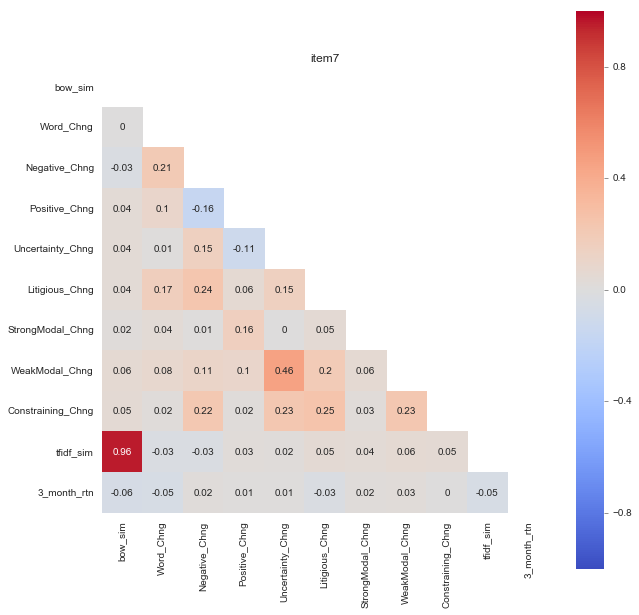

In [8]:
corr = round(df[df.item=='item7'][['bow_sim', 'Word_Chng', 'Negative_Chng', 'Positive_Chng',
       'Uncertainty_Chng', 'Litigious_Chng', 'StrongModal_Chng',
       'WeakModal_Chng', 'Constraining_Chng', 'tfidf_sim', "3_month_rtn"]].corr(method="spearman"), 2)
fig, ax = plt.subplots(figsize=(10,10))  
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, cmap='coolwarm', mask=mask, annot=True, vmin=-1, vmax=1, center= 0, square=True)
plt.title('item7')

Text(0.5, 1.0, 'item7a')

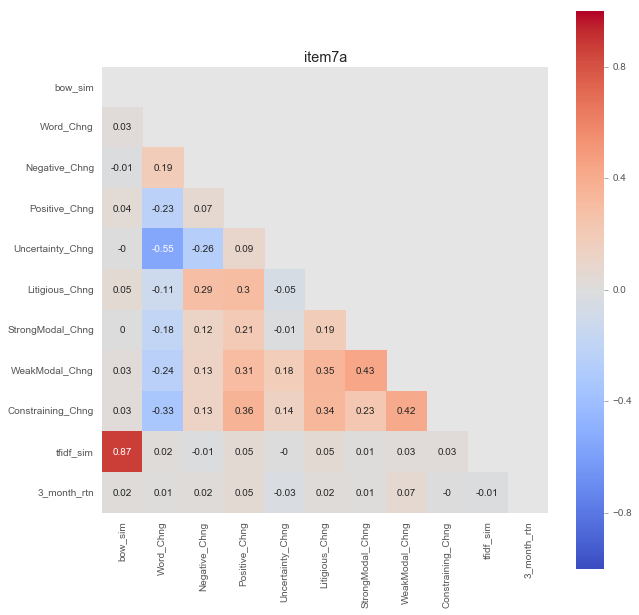

In [10]:
corr = round(df[df.item=='item7a'][['bow_sim', 'Word_Chng', 'Negative_Chng', 'Positive_Chng',
       'Uncertainty_Chng', 'Litigious_Chng', 'StrongModal_Chng',
       'WeakModal_Chng', 'Constraining_Chng', 'tfidf_sim', "3_month_rtn"]].corr(method="spearman"), 2)
fig, ax = plt.subplots(figsize=(10,10))  
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, cmap='coolwarm', mask=mask, annot=True, vmin=-1, vmax=1, center= 0, square=True)
plt.title('item7a')

Text(0.5, 1.0, 'item1a')

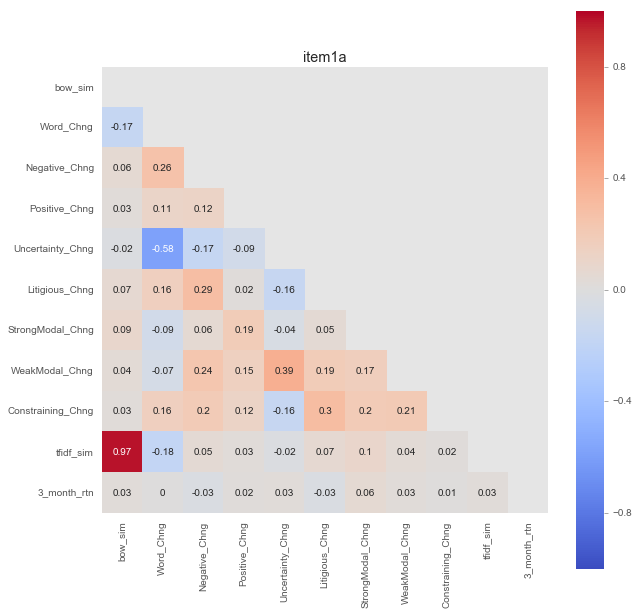

In [11]:
corr = round(df[df.item=='item1a'][['bow_sim', 'Word_Chng', 'Negative_Chng', 'Positive_Chng',
       'Uncertainty_Chng', 'Litigious_Chng', 'StrongModal_Chng',
       'WeakModal_Chng', 'Constraining_Chng', 'tfidf_sim', "3_month_rtn"]].corr(method="spearman"), 2)
fig, ax = plt.subplots(figsize=(10,10))  
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, cmap='coolwarm', mask=mask, annot=True, vmin=-1, vmax=1, center= 0, square=True)
plt.title('item1a')

In [12]:
txt = " ".join(df[df.item=="item7"].processed_text.values)

In [13]:
from wordcloud import WordCloud

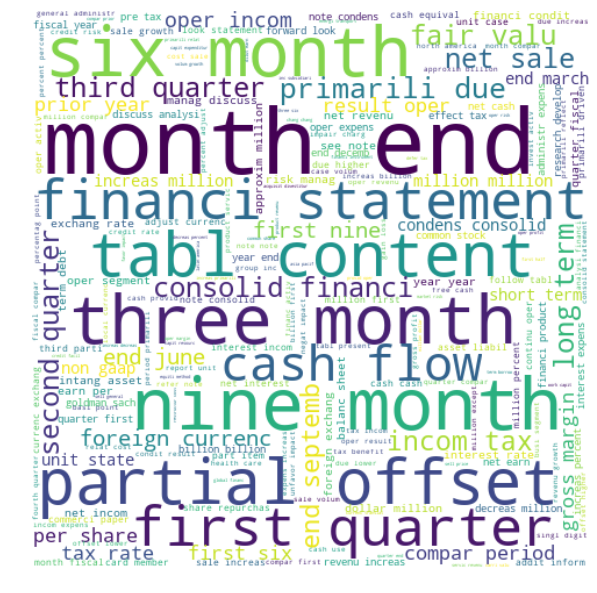

In [14]:
wordcloud = WordCloud(width=480, height=480, margin=0, background_color="white").generate(txt)
plt.figure(figsize=(10,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

#### Pearson

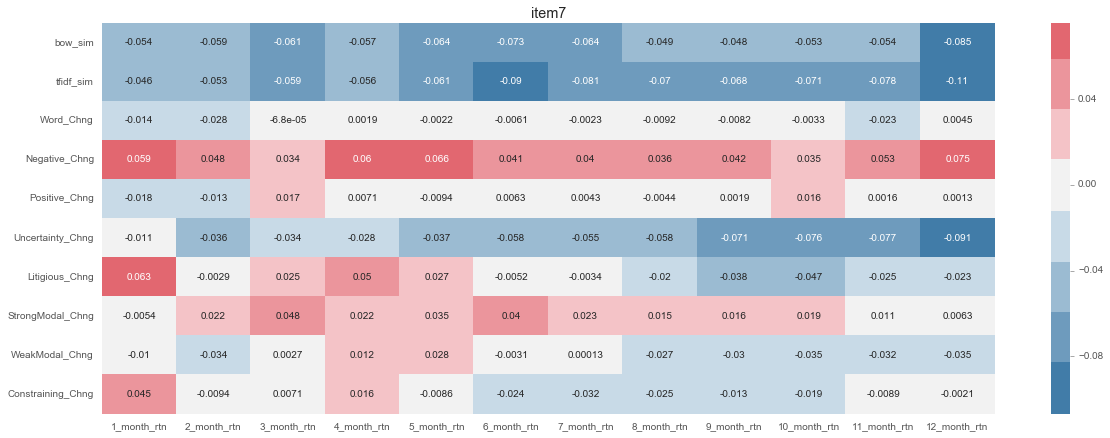

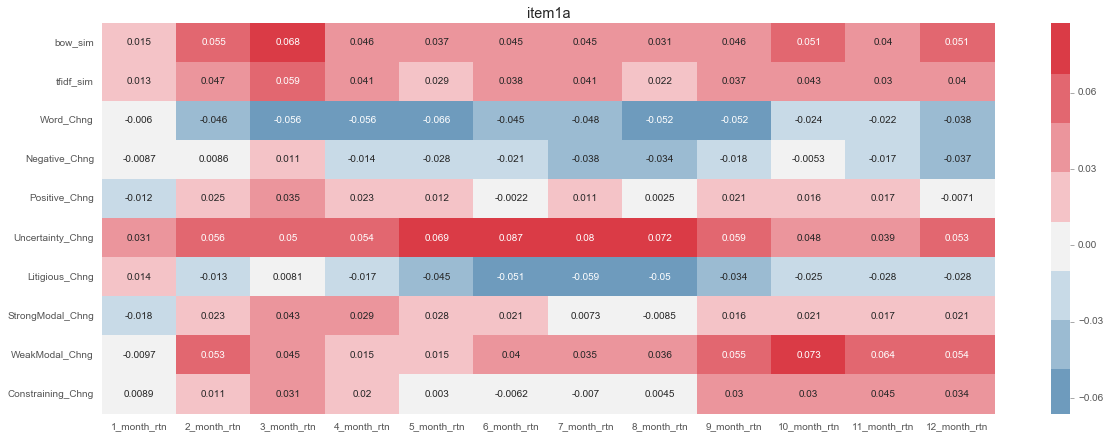

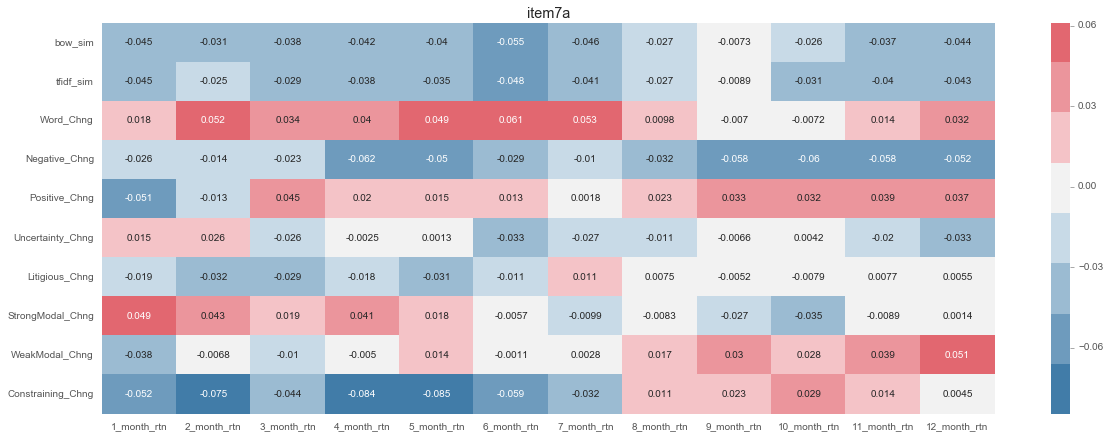

In [15]:
for item in analyse_df.item.unique():
    plt.figure(figsize=(20,7))
    sns.heatmap(analyse_df[analyse_df.item == item].corr().iloc[:10][['1_month_rtn',
       '2_month_rtn', '3_month_rtn', '4_month_rtn', '5_month_rtn',
       '6_month_rtn', '7_month_rtn', '8_month_rtn', '9_month_rtn',
       '10_month_rtn', '11_month_rtn', '12_month_rtn']], annot=True, cmap=cmap, center=0)
    plt.title(item)

#### Spearman

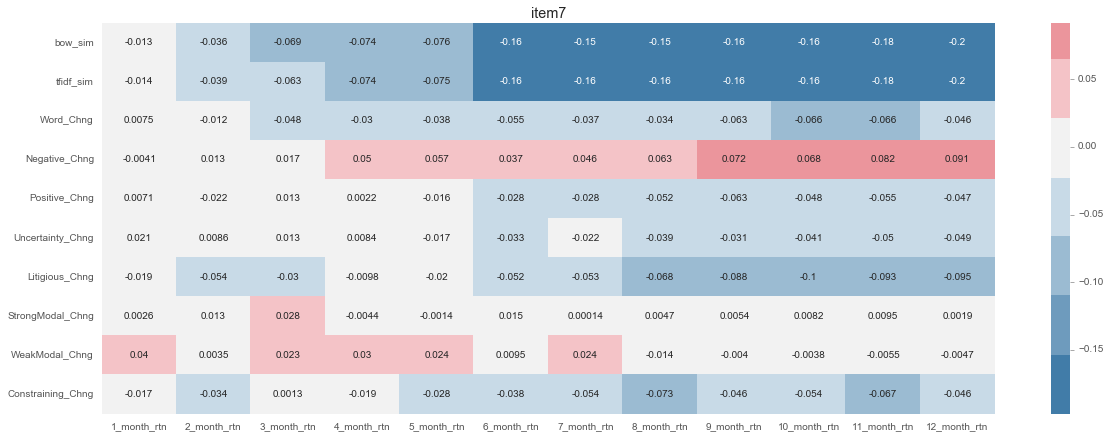

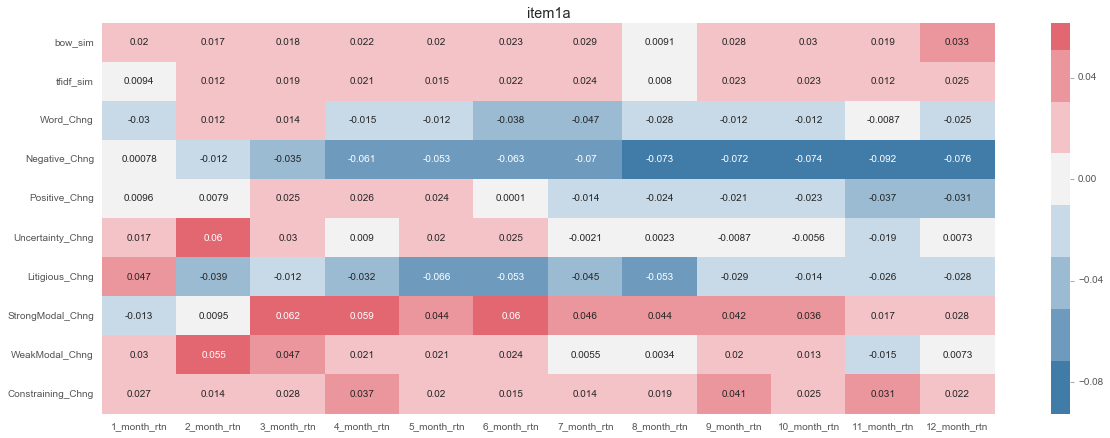

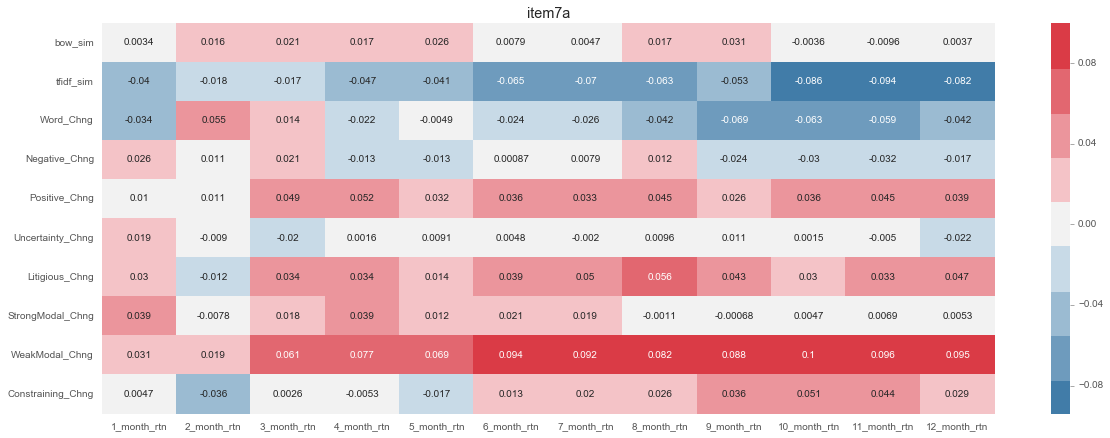

In [16]:
for item in analyse_df.item.unique():
    plt.figure(figsize=(20,7))
    sns.heatmap(analyse_df[analyse_df.item == item].corr(method="spearman").iloc[:10][['1_month_rtn',
       '2_month_rtn', '3_month_rtn', '4_month_rtn', '5_month_rtn',
       '6_month_rtn', '7_month_rtn', '8_month_rtn', '9_month_rtn',
       '10_month_rtn', '11_month_rtn', '12_month_rtn']], annot=True, cmap=cmap, center=0)
    plt.title(item)

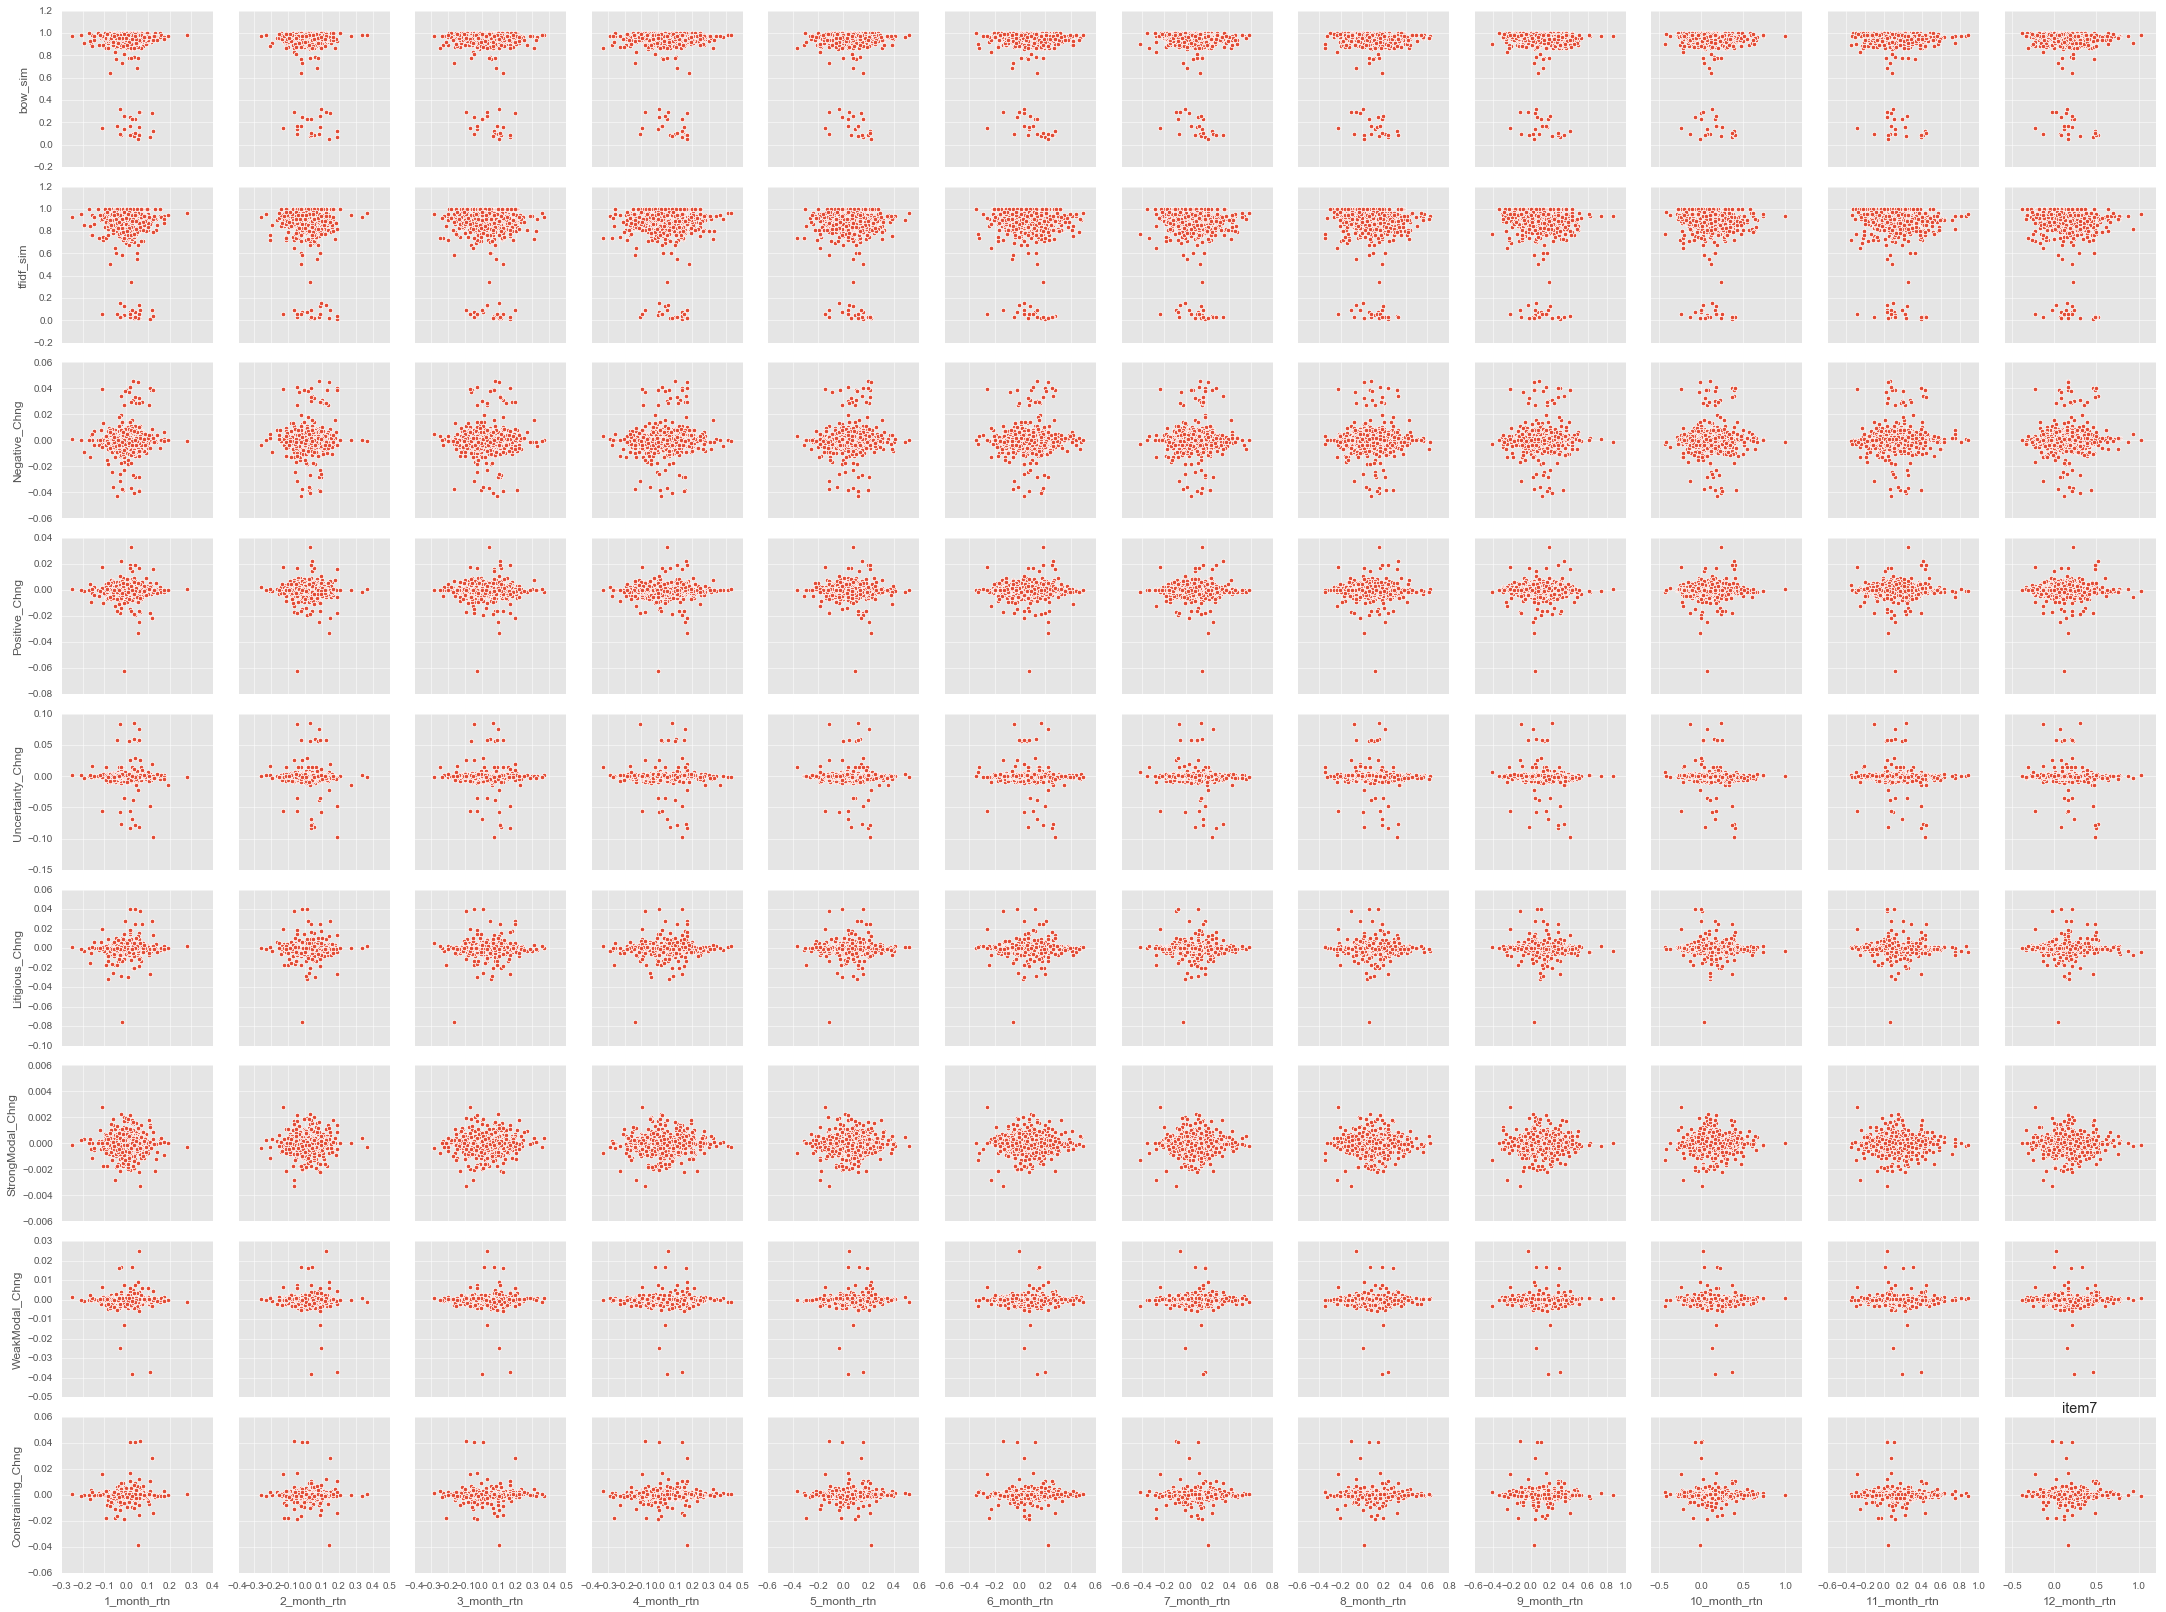

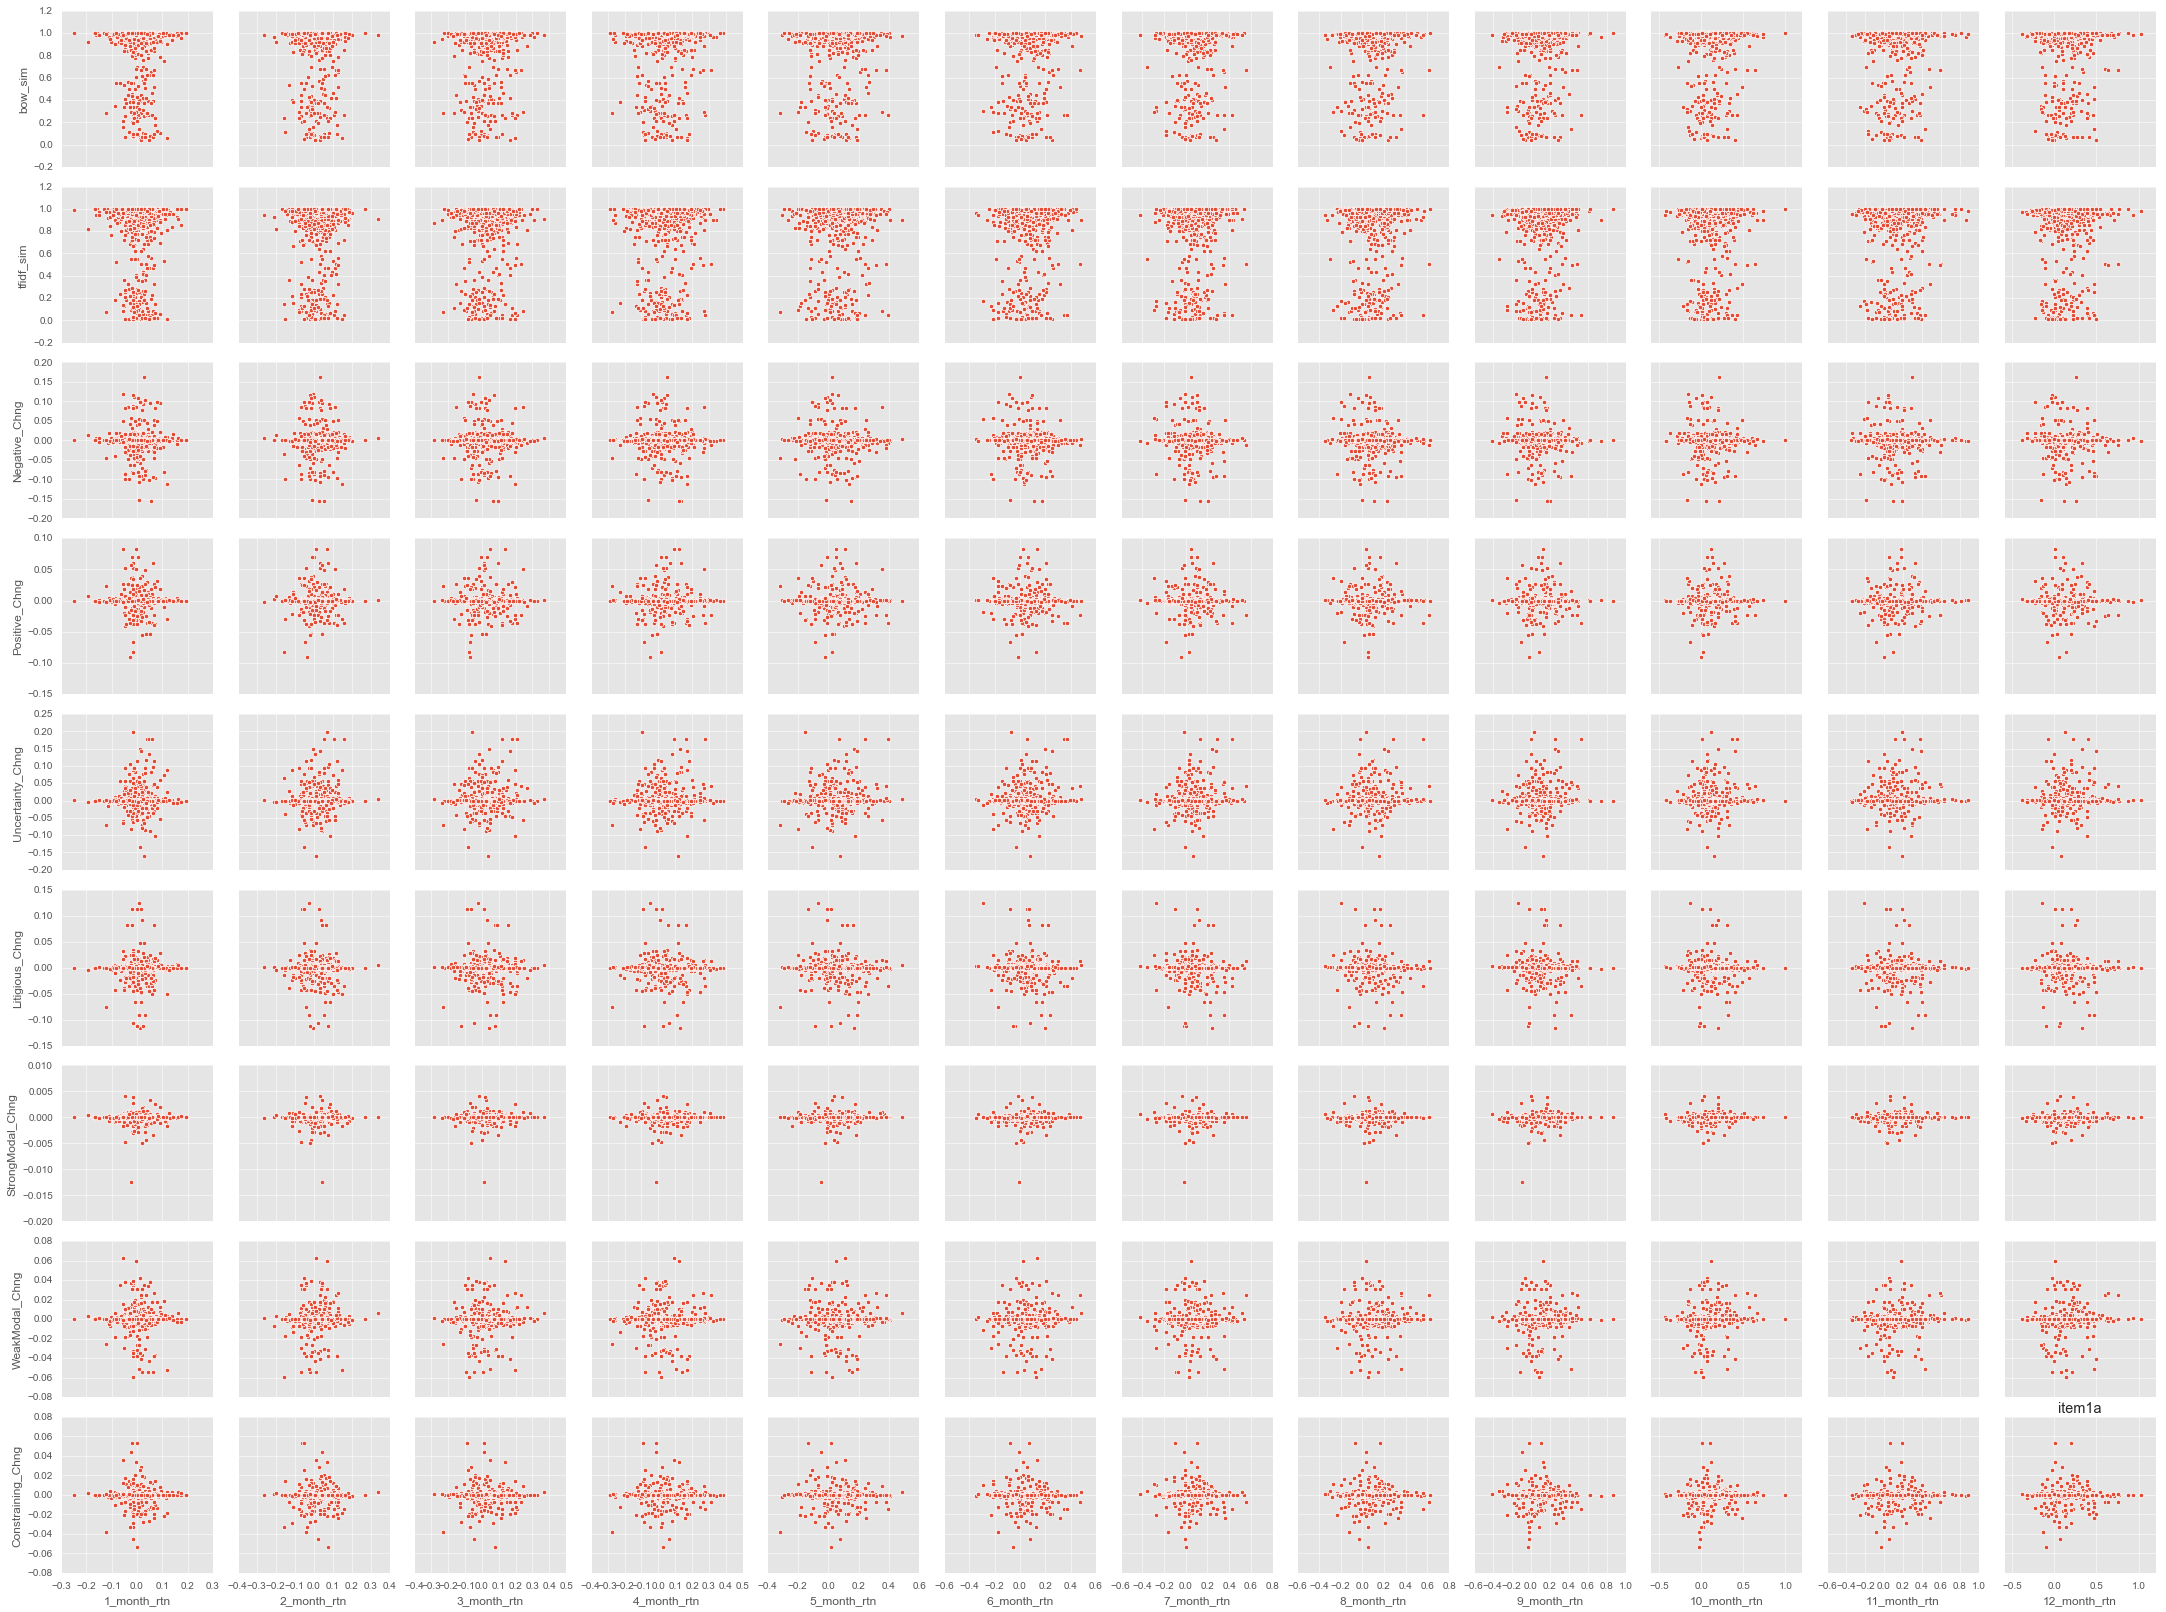

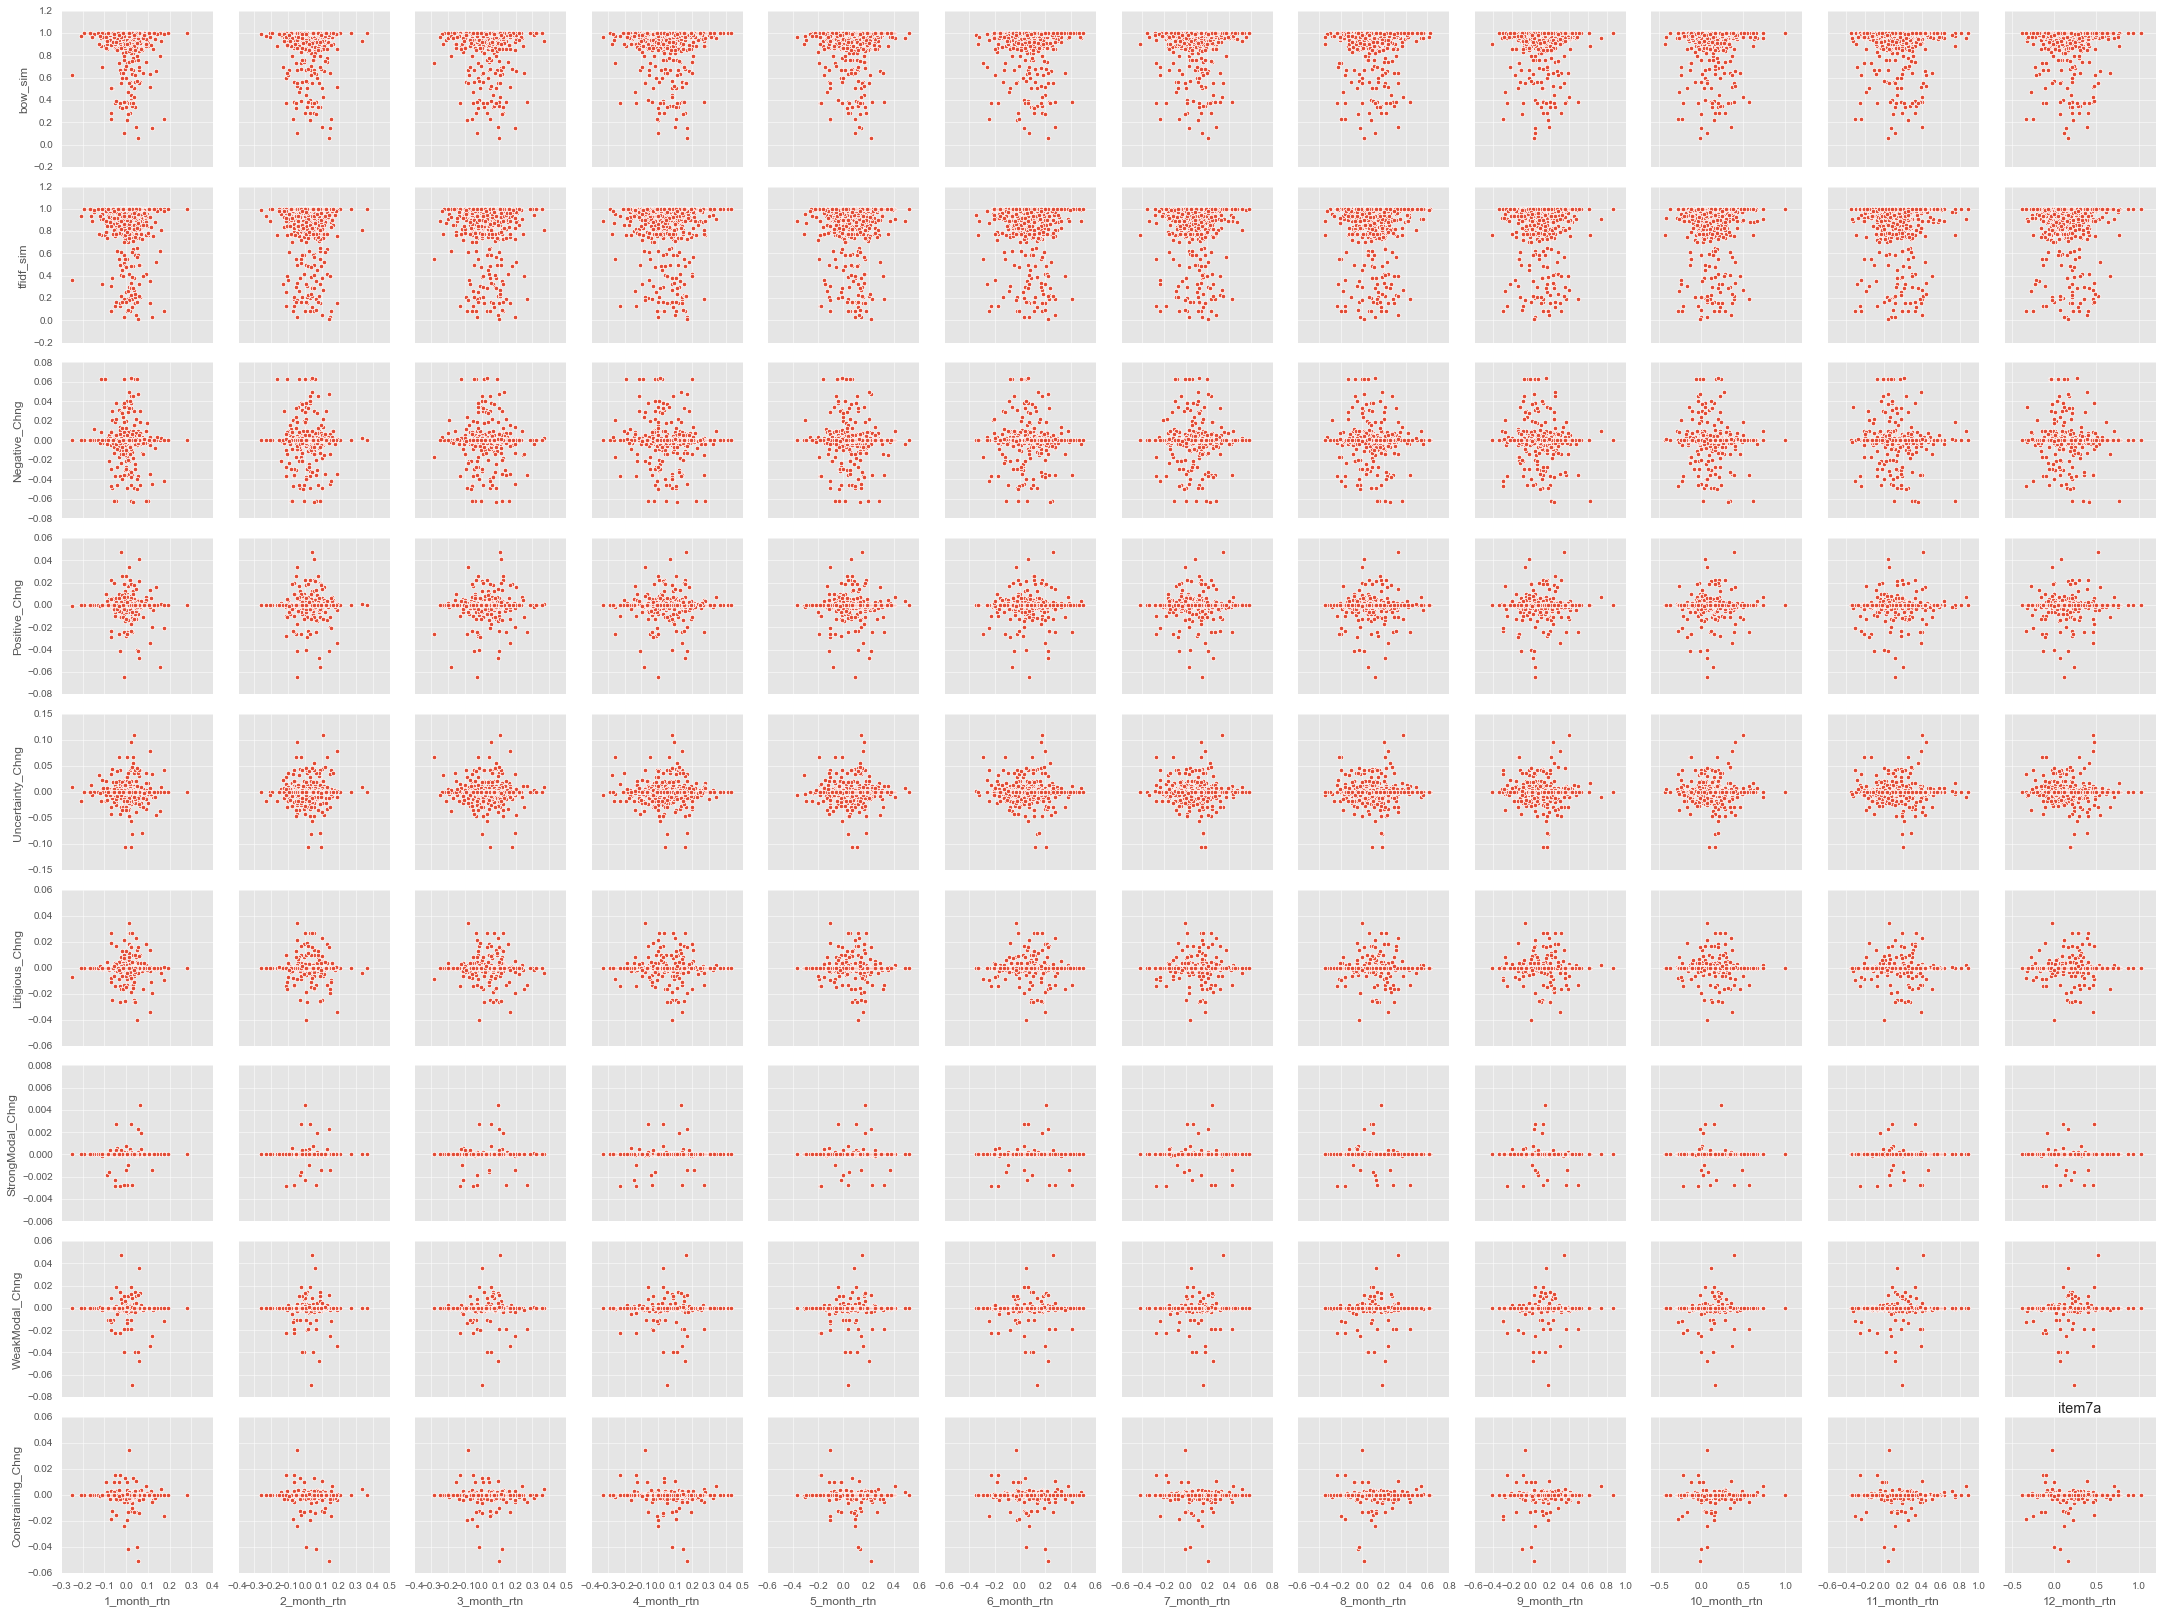

In [17]:
x_vars=['1_month_rtn',
       '2_month_rtn', '3_month_rtn', '4_month_rtn', '5_month_rtn',
       '6_month_rtn', '7_month_rtn', '8_month_rtn', '9_month_rtn',
       '10_month_rtn', '11_month_rtn', '12_month_rtn']
y_vars = ['bow_sim', 'tfidf_sim', 'Negative_Chng', 'Positive_Chng',
       'Uncertainty_Chng', 'Litigious_Chng', 'StrongModal_Chng',
       'WeakModal_Chng', 'Constraining_Chng']
for item in df.item.unique():
    sns.pairplot(data = df[df.item == item],
                     x_vars=x_vars,
                     y_vars=y_vars)
    plt.title(item)